In [1]:
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Prepare objectpoints
NUM_XCOR = 9
NUM_YCOR = 6
objp = np.zeros((NUM_YCOR*NUM_XCOR,3), np.float32)
objp[:,:2] = np.mgrid[0:NUM_XCOR, 0:NUM_YCOR].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# List of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (NUM_XCOR, NUM_YCOR), None)

    # If found, add object points, image points
    if ret == True:
        img_size = (img.shape[1], img.shape[0])
        objpoints.append(objp)
        imgpoints.append(corners)

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

# Save the camera calibration result for later use
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_dist.p", "wb" ) )


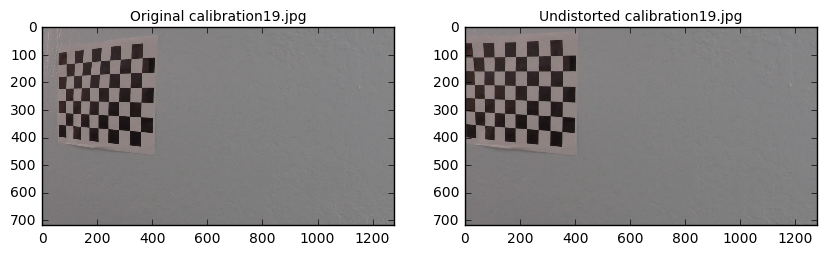

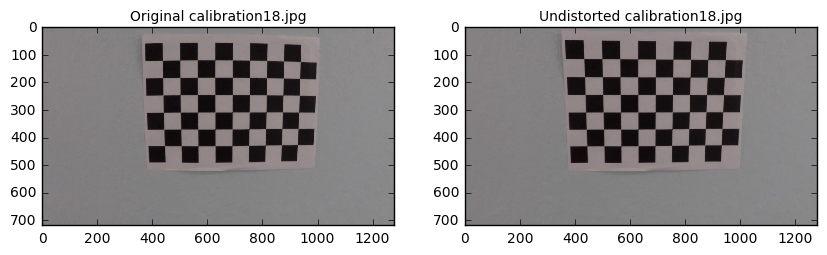

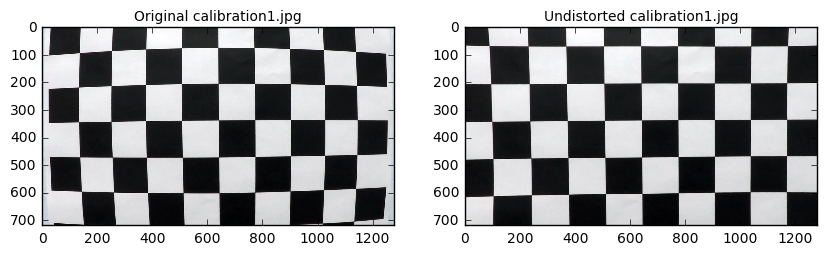

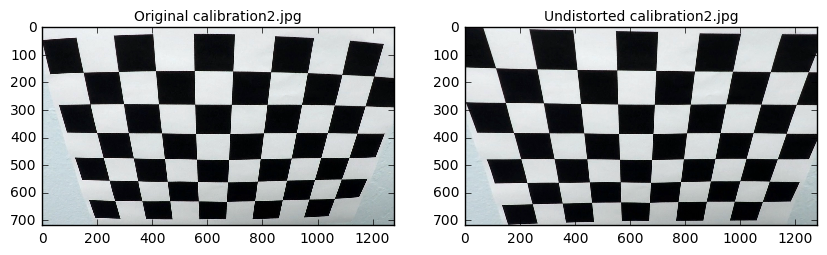

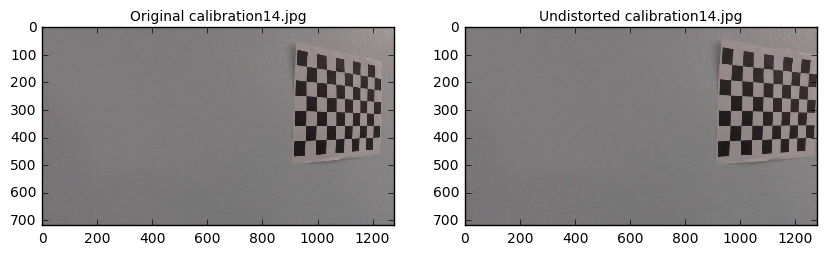

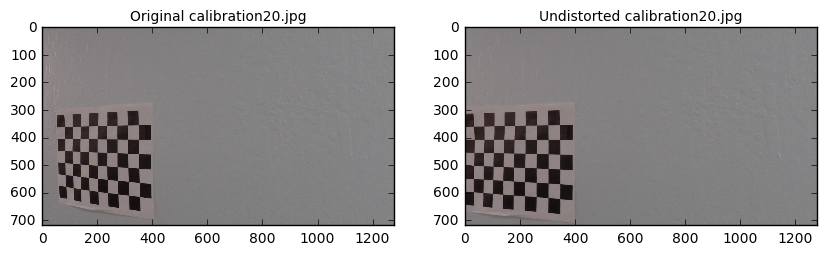

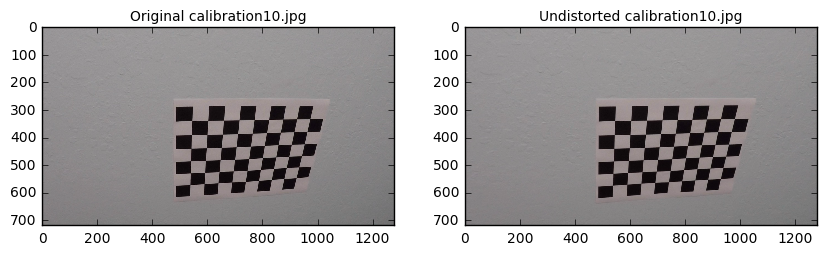

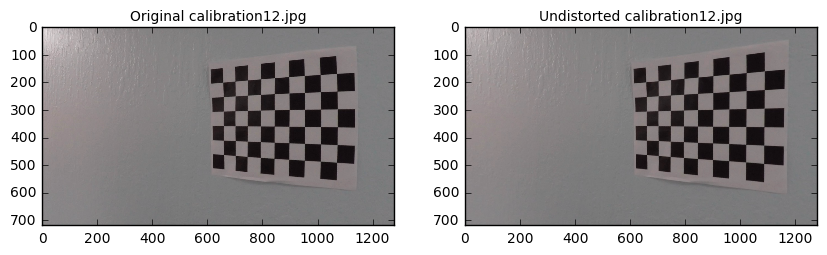

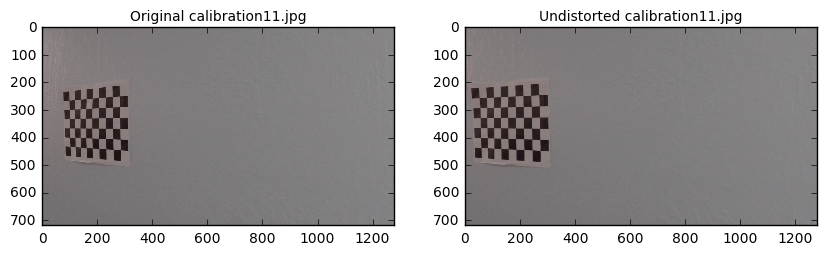

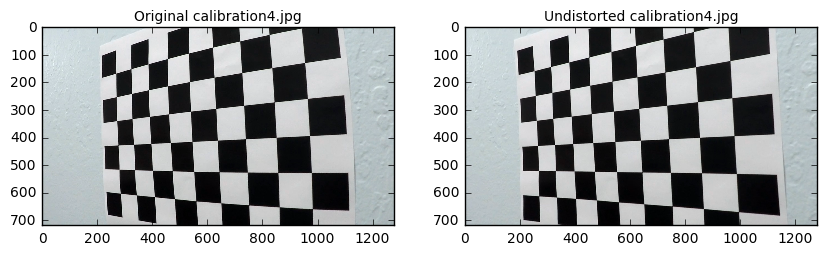

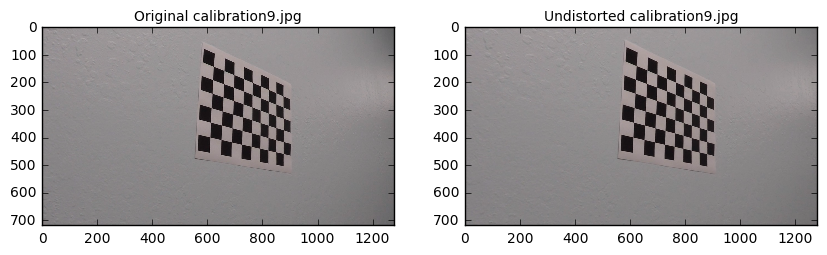

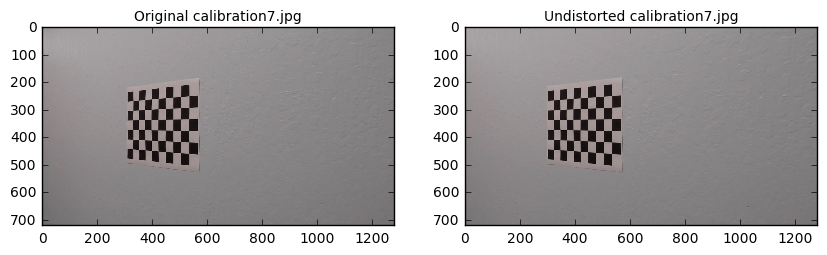

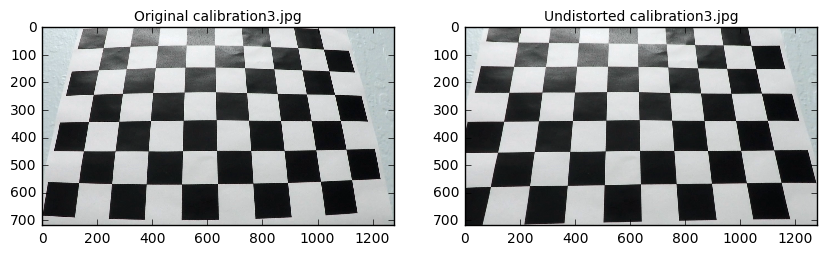

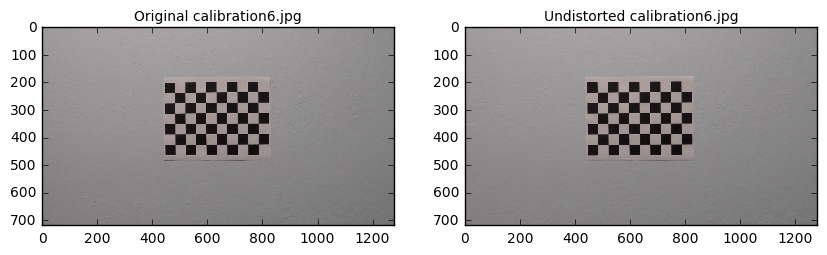

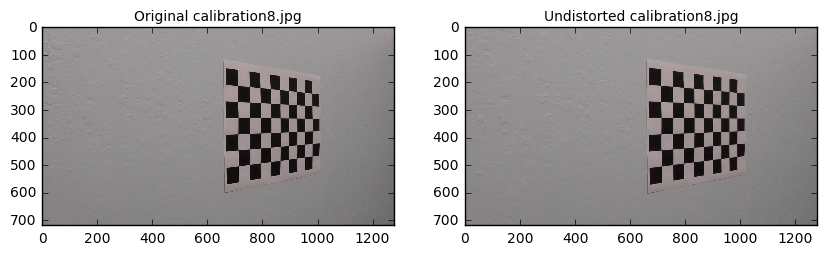

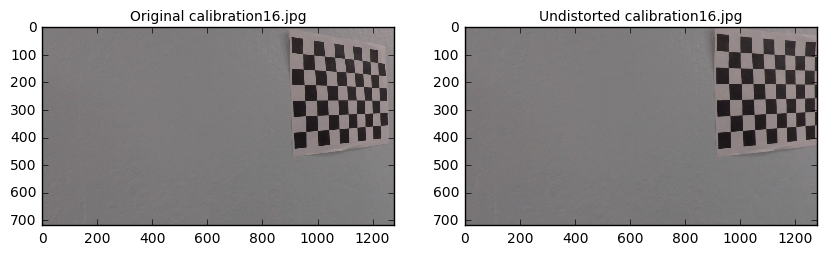

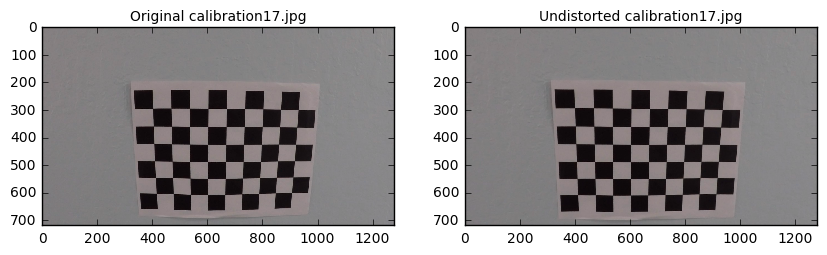

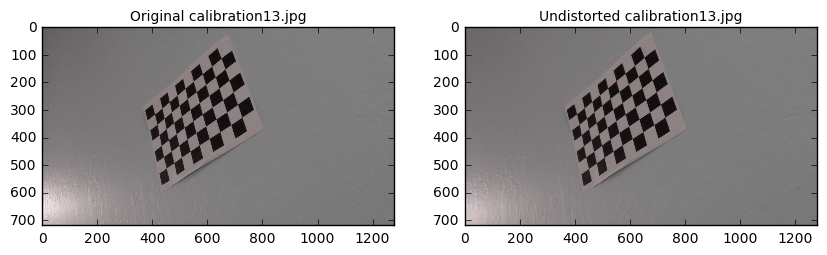

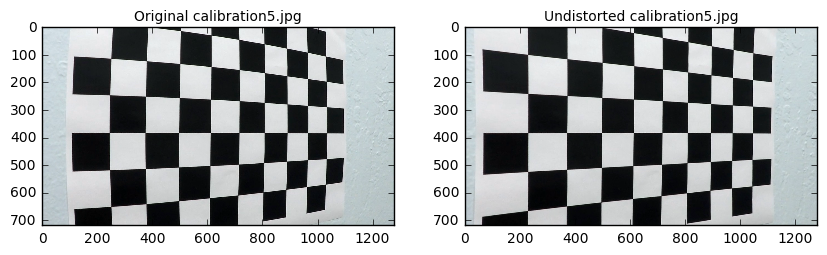

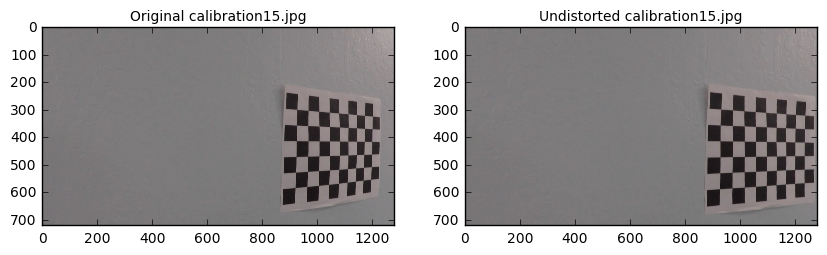

In [3]:
# Read the camera distortion pickle file and load mtx, dist
with open("camera_dist.p", mode='rb') as f:
    dist_pickle = pickle.load(f)

mtx, dist = dist_pickle["mtx"], dist_pickle["dist"]

# for loop for displaying calibration images side by side
cal_images = glob.glob('camera_cal/calibration*.jpg')
for fname in cal_images:
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img)
    ax1.set_title('Original '+fname.replace('camera_cal/', ''), fontsize=10)
    ax2.imshow(dst)
    ax2.set_title('Undistorted '+fname.replace('camera_cal/', ''), fontsize=10)

# for loop for writing undistorted test images in output_iamge directory
test_images = glob.glob('test_images/*.jpg')
for fname in test_images:
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    cv2.imwrite('output_images/undistorted_'+fname.replace('test_images/', ''), dst)
